In [139]:
import pandas as pd
import datetime
import numpy as np
%matplotlib inline

# 设置绘图显示中文
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [167]:
ip = pd.read_csv('./file/ip_info.csv',names=['ip','province','city','ts'],usecols=[2,4,5,6])
# ip.loc[0:2]
# ip_first = ip.loc[0:2]
# ip_first = ip.head(14).copy()
ip_first = ip.dropna().copy()
# ip_first.shape[0]

In [209]:
# 由于数据中，没有整形，因此新增一列
ip_first['data'] = np.ones(ip_first.shape[0],dtype=np.int)
ip_first['YmdHms'] = [datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") for x in ip_first['ts']]
ip_first['Ymd'] = [datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d") for x in ip_first['ts']]
# print (otherStyleTime)
ip_first.head(20)

,ip,province,city,ts,data,YmdHms,Ymd
0,36.22.213.38,浙江,金华,1522069895,1,2018-03-26 13:11:35,2018-03-26
1,223.74.201.158,广东,惠州,1522069895,1,2018-03-26 13:11:35,2018-03-26
2,183.202.123.149,山西,朔州,1522069895,1,2018-03-26 13:11:35,2018-03-26
3,58.19.6.95,湖北,武汉,1522069895,1,2018-03-26 13:11:35,2018-03-26
4,220.176.183.233,江西,宜春,1522069895,1,2018-03-26 13:11:35,2018-03-26
5,220.115.178.92,广东,广州,1522069895,1,2018-03-26 13:11:35,2018-03-26
6,1.204.214.0,贵州,贵阳,1522069895,1,2018-03-26 13:11:35,2018-03-26
8,111.35.211.132,山东,烟台,1522069895,1,2018-03-26 13:11:35,2018-03-26
9,122.71.61.149,北京,北京,1522069895,1,2018-03-26 13:11:35,2018-03-26
10,223.72.71.115,北京,北京,1522069896,1,2018-03-26 13:11:36,2018-03-26


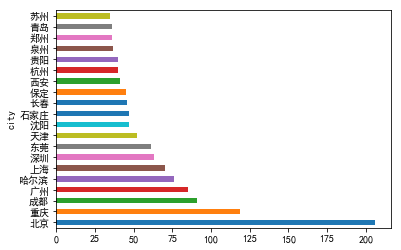

In [193]:
d = ip_first.groupby(['city'])
s = d['data'].sum()
s.sort_values(ascending=False).head(20).plot.barh()

In [208]:
d_sum = d['data'].agg(['sum'])
d_sum['zb'] = d_sum['sum']/d_sum['sum'].sum()
d_sum.sort_values(by='zb',ascending=False)

,sum,zb
city,,
北京,206,0.049579
重庆,119,0.028640
成都,91,0.021901
广州,85,0.020457
哈尔滨,76,0.018291
上海,70,0.016847
深圳,63,0.015162
东莞,61,0.014681
天津,52,0.012515
